In [1]:
import pandas as pd

DATA = '/kaggle/input/big-eartquakes-1900-1999-dataset/earthquakes.csv'
df = pd.read_csv(filepath_or_buffer=DATA)
df.head()

,year,month,day,richter,area,region,deaths
0,1902,April,19,7.5,Quezaltenango and San Marco,Guatemala,2000.0
1,1902,December,16,6.4,Uzbekistan,Russia,4700.0
2,1903,April,28,7.0,Malazgirt,Turkey,3500.0
3,1903,May,28,5.8,Gole,Turkey,1000.0
4,1905,April,4,7.5,Kangra,India,19000.0


The Richter scale is a logarithmic scale; how do we expect our Richter scale values to be distributed?

<Axes: xlabel='richter', ylabel='Count'>

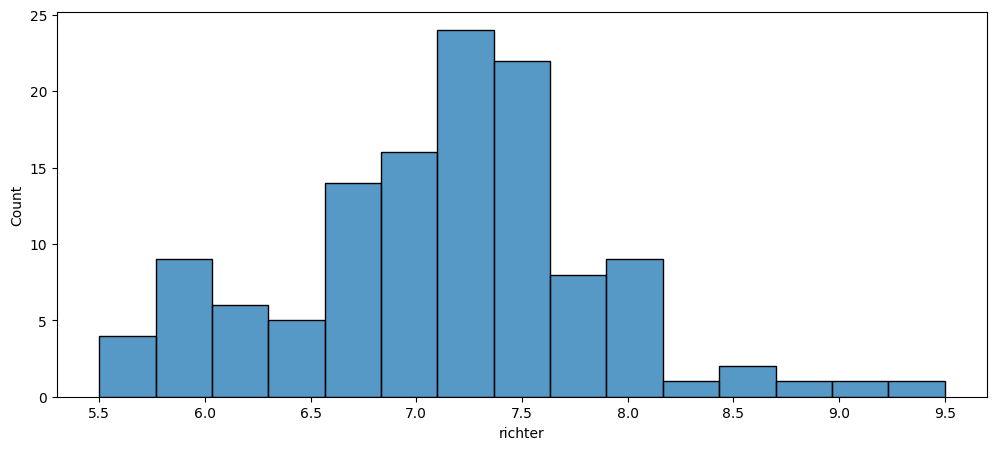

In [2]:
import matplotlib.pyplot as plt
from seaborn import histplot
from warnings import filterwarnings

filterwarnings(action='ignore', category=FutureWarning)
plt.figure(figsize=(12, 5))
histplot(data=df, x='richter')

That's odd. We would expect lots more small earthquakes and almost no large ones. What we're probably seeing here is that little earthquakes are difficult to detect, or that detection equipment is not evenly distributed over places that have earthquakes, and that's why we see this sort of Gaussian distribution.

How would we expect death tolls to be distributed? We might expect them to be similarly distributed, but people are not evenly distributed relative to where earthquakes are distributed. So who knows?

<Axes: xlabel='deaths', ylabel='Count'>

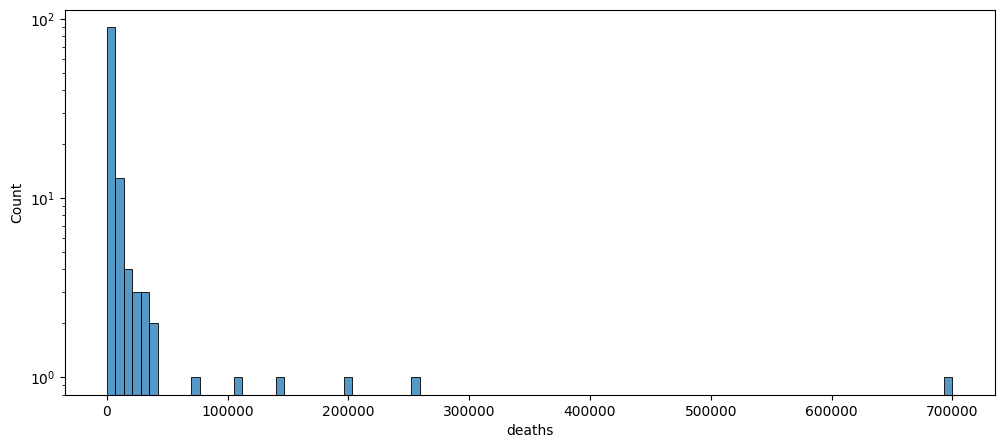

In [3]:
plt.figure(figsize=(12, 5))
plt.yscale(value='log')
histplot(data=df, x='deaths', bins=100)

What do we see? We see that most earthquakes cause relatively few deaths, but in the right tail there are some events with quite large death tolls. Maybe we should try plotting this data together.

<Axes: xlabel='richter', ylabel='deaths'>

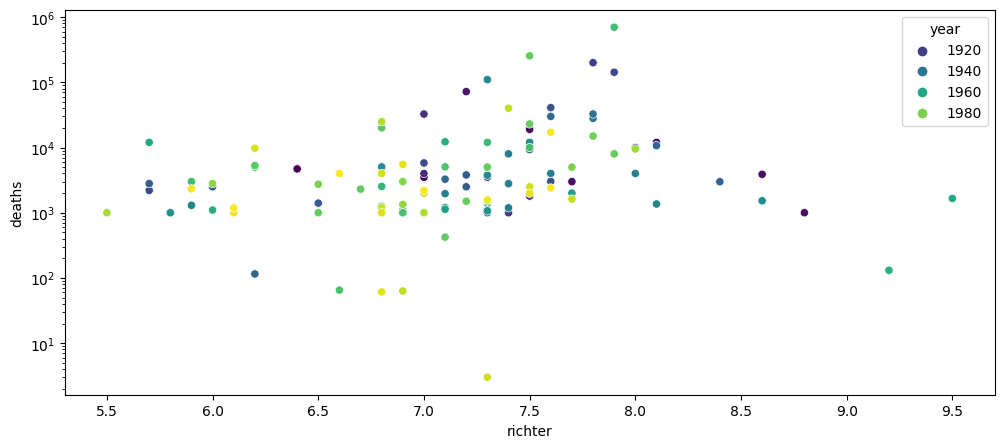

In [4]:
from seaborn import scatterplot


plt.figure(figsize=(12, 5))
plt.yscale(value='log')
scatterplot(data=df, x='richter', y='deaths', hue='year', palette='viridis')

What do we see? There really appears to be no correlation whatsoever between the magnitude of an earthquake and its death toll.

<Axes: >

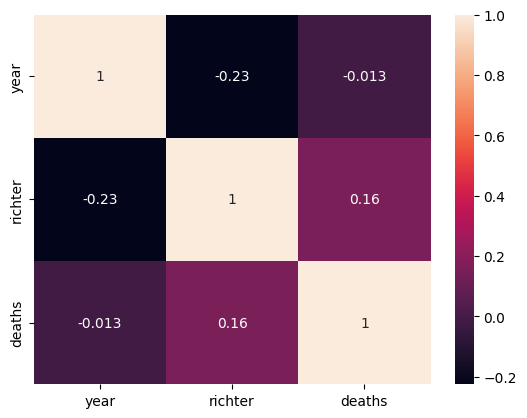

In [5]:
from seaborn import heatmap
heatmap(annot=True, data=df[['year', 'richter', 'deaths']].corr(), )

Not surprisingly when we look at the Pearson correlations our three variables (magnitude, death toll, and time) are weakly correlated.